# Heart Statlog Cleveland Hungary Final
If you are using Jupyter Notebook
- conda install tensorflow
- conda install graphviz
- conda install pydot

Features
1. Age: Patients Age in years (Numeric)
2. Sex: Gender of patient (Male - 1, Female - 0) (Nominal)
3. Chest Pain Type: Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non- anginal pain, 4 asymptomatic (Nominal)
4. resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
5. cholestrol: Serum cholestrol in mg/dl (Numeric)
6. fasting blood sugar: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. resting ecg: Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)
8. max heart rate: Maximum heart rate achieved (Numeric)
9. exercise angina: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression (segment depression) in comparison with the state of rest (Numeric)
11. ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)

- Target variable
12. target: It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## Observing Dataset

In [4]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [7]:
df.corr()['target'].sort_values(ascending = False)

target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
resting bp s           0.121415
resting ecg            0.073059
cholesterol           -0.198366
max heart rate        -0.413278
Name: target, dtype: float64

## Visualizing the Data

### Heatmap

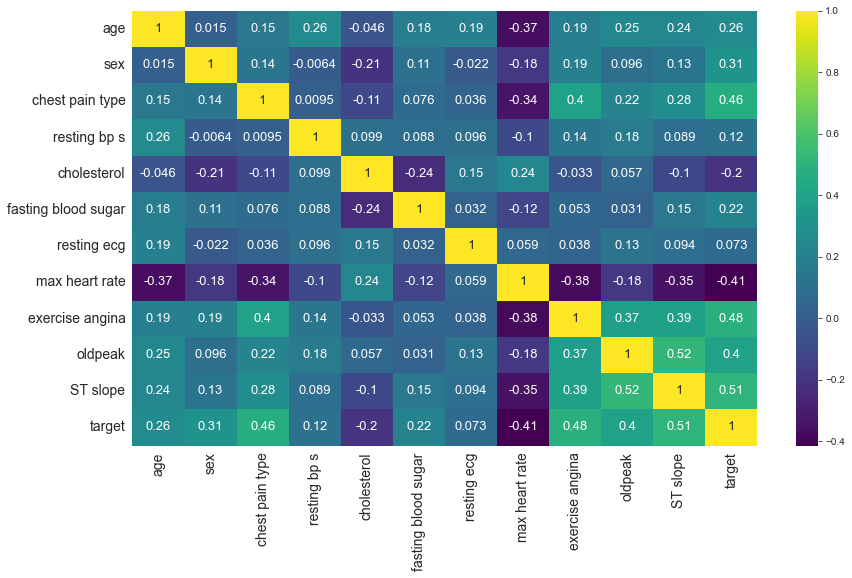

In [8]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(),annot = True,annot_kws={'size':13},cmap = 'viridis')
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

### Target

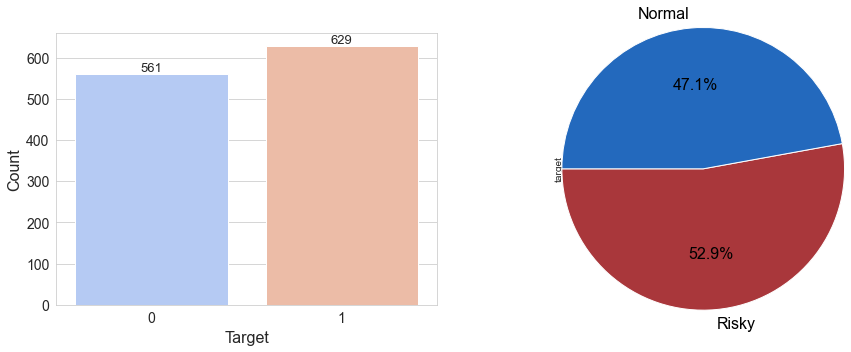

In [9]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
ax = sns.countplot(x = 'target',data = df,palette = 'coolwarm')
ax.bar_label(ax.containers[0],size = 13)
plt.xticks(size = 14)
plt.xlabel('Target',size = 16)
plt.yticks(size = 14)
plt.ylabel('Count',size = 16)

plt.subplot(1,2,2)
df['target'].value_counts().plot.pie(autopct = '%.1f%%',radius = 1.3,textprops = {'fontsize':16,'color':'black'},
                                     labels = ['Risky','Normal'],cmap = 'vlag_r',startangle = 180)

plt.show()

In [10]:
def plot_count(feature):
    ax = sns.countplot(x = feature,data = df,palette = 'inferno')
    ax.bar_label(ax.containers[0],size = 13)
    plt.xlabel(feature.title(),size = 16)
    plt.xticks(size = 14)
    plt.ylabel('Count',size = 16)
    plt.yticks(size = 14)

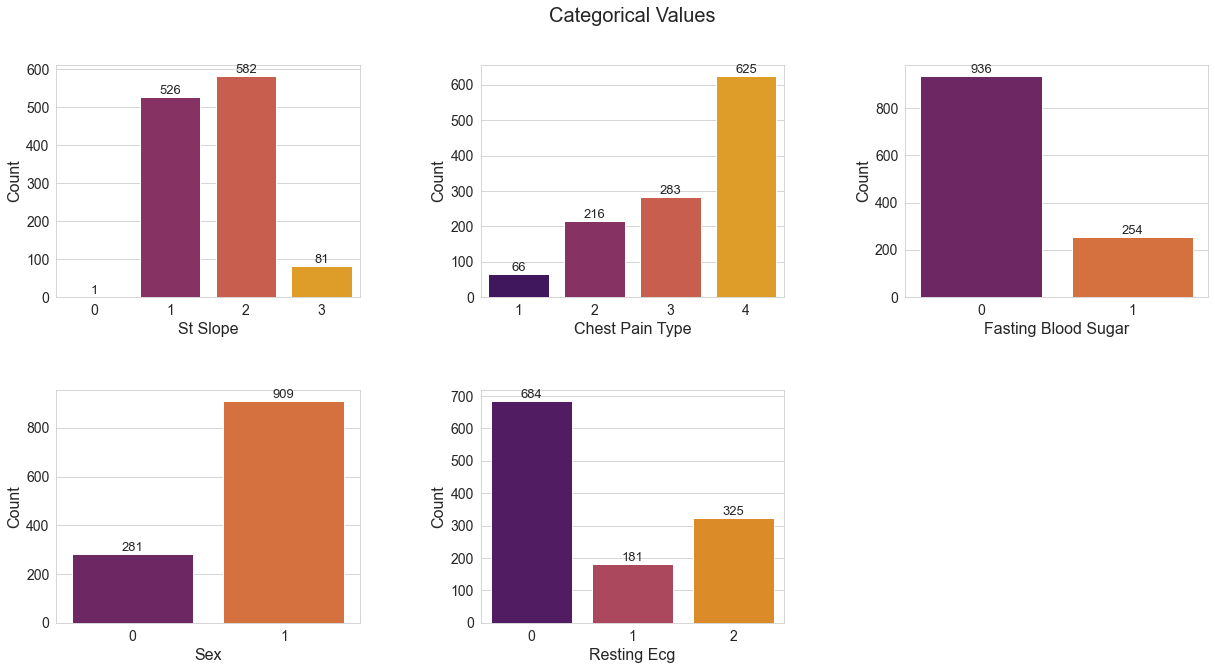

In [11]:
plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
plot_count('ST slope')

plt.subplot(2,3,2)
plot_count('chest pain type')

plt.subplot(2,3,3)
plot_count('fasting blood sugar')

plt.subplot(2,3,4)
plot_count('sex')

plt.subplot(2,3,5)
plot_count('resting ecg')

plt.suptitle('Categorical Values',size = 20)
plt.subplots_adjust(left = 0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

### Max Heart Rate

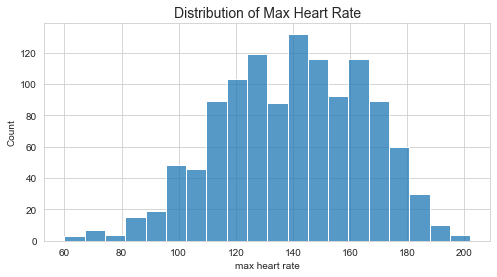

In [12]:
plt.figure(figsize = (8,4))
sns.histplot(x = 'max heart rate',data = df)
plt.title('Distribution of Max Heart Rate',size = 14)
plt.show()

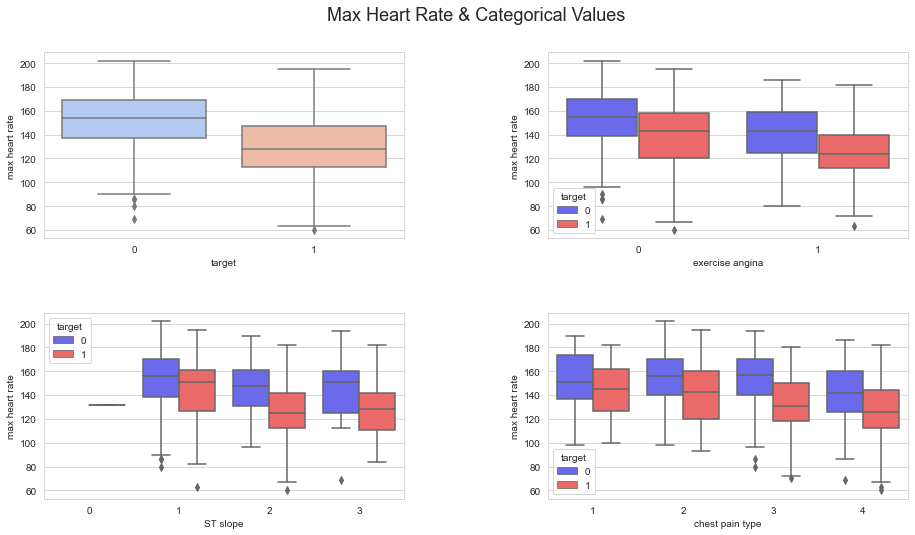

In [13]:
plt.figure(figsize = (15,8))

plt.subplot(2,2,1)
sns.boxplot(x = 'target',y = 'max heart rate',data = df,palette = 'coolwarm')

plt.subplot(2,2,2)
sns.boxplot(x = 'exercise angina',y = 'max heart rate',hue = 'target',data = df,palette = 'seismic')

plt.subplot(2,2,3)
sns.boxplot(x = 'ST slope',y = 'max heart rate',hue = 'target',data = df,palette = 'seismic')

plt.subplot(2,2,4)
sns.boxplot(x = 'chest pain type',y = 'max heart rate',hue = 'target',data = df,palette = 'seismic')

plt.suptitle('Max Heart Rate & Categorical Values',size = 18)
plt.subplots_adjust(left = 0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [14]:
def plot_box_heart_vs_age(data,title):
    sns.boxplot(x = 'age',y = 'max heart rate',hue = 'target',data = data,palette = 'seismic')
    plt.ylabel('Max Heart Rate',size = 16)
    plt.yticks(size = 14)
    plt.xlabel('Age',size = 16)
    plt.xticks(size = 14)
    plt.title(title,size = 18)

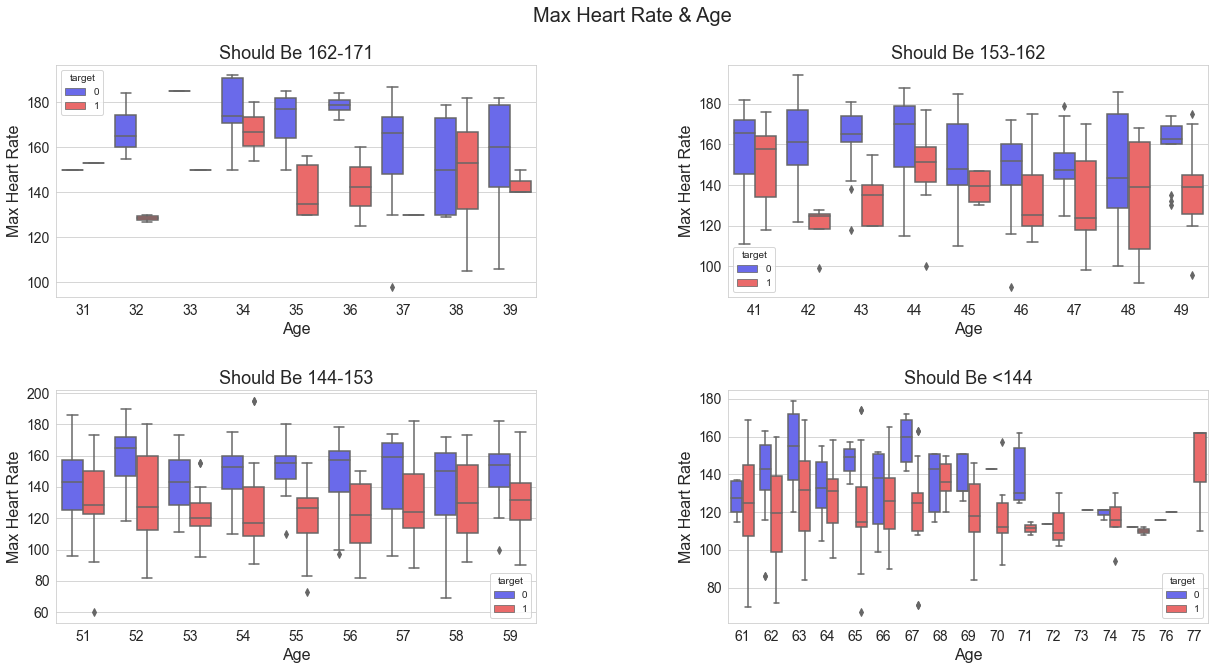

In [15]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plot_box_heart_vs_age(df[(df.age>30) & (df.age<40)],'Should Be 162-171')

plt.subplot(2,2,2)
plot_box_heart_vs_age(df[(df.age>40) & (df.age<50)],'Should Be 153-162')

plt.subplot(2,2,3)
plot_box_heart_vs_age(df[(df.age>50) & (df.age<60)],'Should Be 144-153')

plt.subplot(2,2,4)
plot_box_heart_vs_age(df[df.age>60],'Should Be <144')

plt.suptitle('Max Heart Rate & Age',size = 20)
plt.subplots_adjust(left = 0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

### Cholesterol

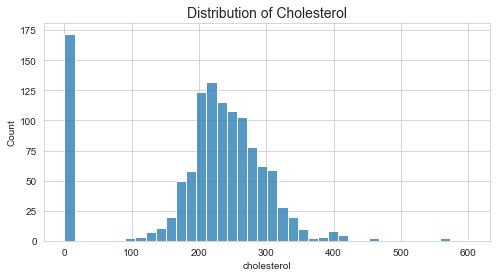

In [16]:
plt.figure(figsize = (8,4))
sns.histplot(x = 'cholesterol',data = df)
plt.title('Distribution of Cholesterol',size = 14)
plt.show()

In [17]:
def plot_pie_target(data,title):
    data.plot.pie(autopct = '%.1f%%',radius = 1.3,
                                    textprops = {'fontsize':16,'color':'black'},labels = ['Normal Heart','Risky Heart'],
                                    cmap = 'vlag',startangle = 60)
    plt.title(title,size = 18,y = 1.1)

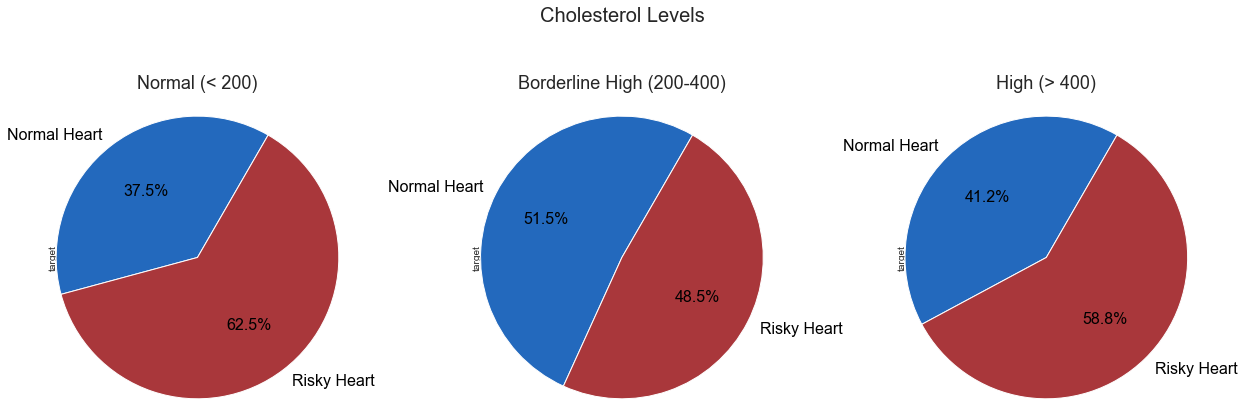

In [18]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plot_pie_target(df[df.cholesterol<200]['target'].value_counts().sort_values(),'Normal (< 200)')

plt.subplot(1,3,2)
plot_pie_target(df[(df.cholesterol>200) & (df.cholesterol<400)]['target'].value_counts().sort_values(ascending = False),'Borderline High (200-400)')

plt.subplot(1,3,3)
plot_pie_target(df[df.cholesterol>400]['target'].value_counts().sort_values(),'High (> 400)')

plt.suptitle('Cholesterol Levels',size = 20,y = 1.2)

plt.subplots_adjust(left = 0.1, right=0.9,wspace=0.4,hspace=0.4)
plt.show()

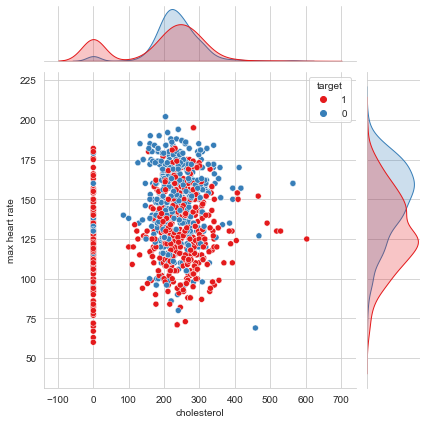

In [19]:
sns.jointplot(x = 'cholesterol',y = 'max heart rate',hue = 'target',hue_order=[1,0],data = df,palette = 'Set1')
plt.show()

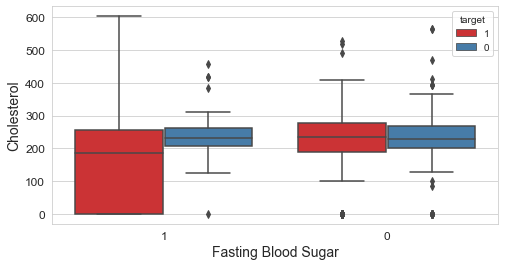

In [20]:
plt.figure(figsize = (8,4))
sns.boxplot(x = 'fasting blood sugar',y = 'cholesterol',order=[1,0],hue = 'target',hue_order=[1,0],data = df,palette = 'Set1')
plt.xlabel('Fasting Blood Sugar',size = 14)
plt.xticks(size = 12)
plt.ylabel('Cholesterol',size = 14)
plt.yticks(size = 12)
plt.show()

### Age

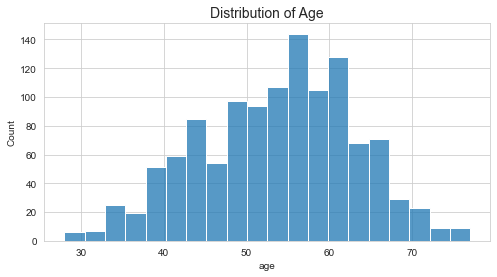

In [21]:
plt.figure(figsize = (8,4))
sns.histplot(x = 'age',data = df)
plt.title('Distribution of Age',size = 14)
plt.show()

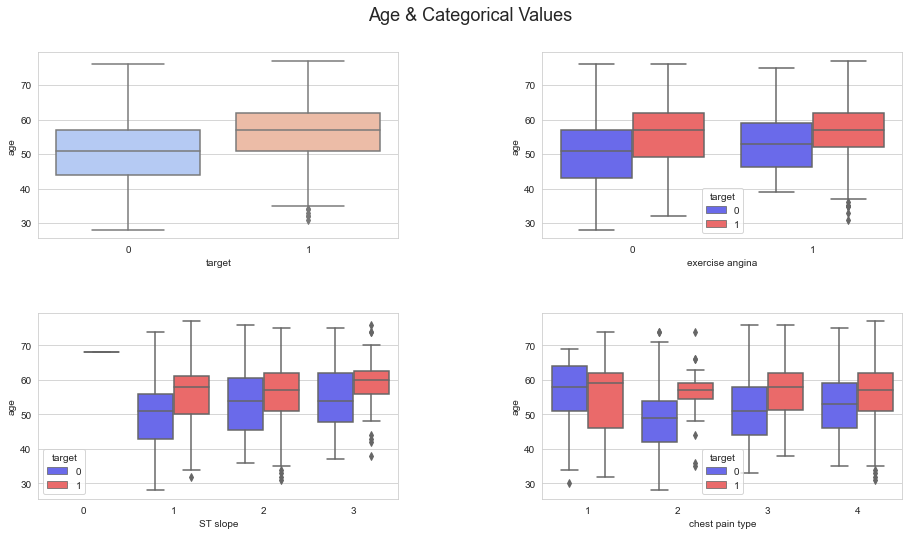

In [22]:
plt.figure(figsize = (15,8))

plt.subplot(2,2,1)
sns.boxplot(x = 'target',y = 'age',data = df,palette = 'coolwarm')

plt.subplot(2,2,2)
sns.boxplot(x = 'exercise angina',y = 'age',hue = 'target',data = df,palette = 'seismic')

plt.subplot(2,2,3)
sns.boxplot(x = 'ST slope',y = 'age',hue = 'target',data = df,palette = 'seismic')

plt.subplot(2,2,4)
sns.boxplot(x = 'chest pain type',y = 'age',hue = 'target',data = df,palette = 'seismic')

plt.suptitle('Age & Categorical Values',size = 18)
plt.subplots_adjust(left = 0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

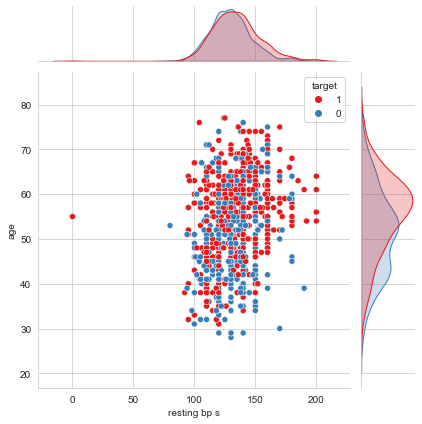

In [23]:
sns.jointplot(y = 'age',x = 'resting bp s',data = df,hue = 'target',hue_order = [1,0],palette = 'Set1')

### Removing Some Data

In [24]:
df = df[df['ST slope']!=0] # 1 person

## Data Preprocessing

In [25]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Artificial Neural Network Model

### Importing Libraries

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

### Creating the Model

In [29]:
model = Sequential()

model.add(Dense(units=11,activation='relu'))

model.add(Dense(units=6,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25) 

### Training the Model

In [31]:
model.fit(x = X_train, y = y_train,batch_size=32,epochs=200,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/200
28/28 [==============================] - 1s 7ms/step - loss: 0.7389 - accuracy: 0.4534 - val_loss: 0.7088 - val_accuracy: 0.4832
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5477 - val_loss: 0.6555 - val_accuracy: 0.5940
Epoch 3/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.6330 - val_loss: 0.6134 - val_accuracy: 0.6846
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.7093 - val_loss: 0.5757 - val_accuracy: 0.7550
Epoch 5/200
28/28 [==============================] - 0s 1ms/step - loss: 0.5673 - accuracy: 0.7576 - val_loss: 0.5376 - val_accuracy: 0.7819
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7767 - val_loss: 0.5053 - val_accuracy: 0.8020
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7980 - val_loss: 0.4757 - val_accuracy: 0.8087
Epoch 8/200
2

Epoch 59/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8709 - val_loss: 0.3101 - val_accuracy: 0.8490
Epoch 60/200
28/28 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.8698 - val_loss: 0.3087 - val_accuracy: 0.8523
Epoch 61/200
28/28 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.8743 - val_loss: 0.3082 - val_accuracy: 0.8523
Epoch 62/200
28/28 [==============================] - 0s 2ms/step - loss: 0.2974 - accuracy: 0.8721 - val_loss: 0.3086 - val_accuracy: 0.8523
Epoch 63/200
28/28 [==============================] - 0s 1ms/step - loss: 0.2968 - accuracy: 0.8743 - val_loss: 0.3080 - val_accuracy: 0.8523
Epoch 64/200
28/28 [==============================] - 0s 1ms/step - loss: 0.2952 - accuracy: 0.8777 - val_loss: 0.3066 - val_accuracy: 0.8523
Epoch 65/200
28/28 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8765 - val_loss: 0.3070 - val_accuracy: 0.8523
Epoch 

28/28 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.8979 - val_loss: 0.3014 - val_accuracy: 0.8658
Epoch 117/200
28/28 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8945 - val_loss: 0.3019 - val_accuracy: 0.8591
Epoch 118/200
28/28 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.8990 - val_loss: 0.3012 - val_accuracy: 0.8624
Epoch 119/200
28/28 [==============================] - 0s 1ms/step - loss: 0.2539 - accuracy: 0.8990 - val_loss: 0.3020 - val_accuracy: 0.8624
Epoch 120/200
28/28 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.8979 - val_loss: 0.3009 - val_accuracy: 0.8658
Epoch 121/200
28/28 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.8967 - val_loss: 0.3022 - val_accuracy: 0.8658
Epoch 122/200
28/28 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.8990 - val_loss: 0.3021 - val_accuracy: 0.8624
Epoch 123/200

<AxesSubplot:>

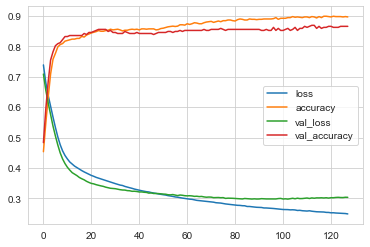

In [32]:
model_history = pd.DataFrame(model.history.history)
model_history.plot()

## Plotting the Model

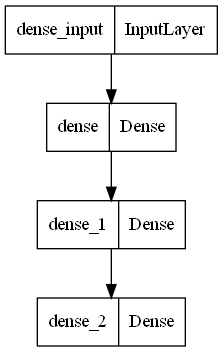

In [33]:
plot_model(model,to_file='model.png')

## Result

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
y_pred = (model.predict(X_test) > 0.5).astype('int32')

10/10 [==============================] - 0s 962us/step


In [36]:
print(confusion_matrix(y_test,y_pred))

[[113  19]
 [ 21 145]]


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       132
           1       0.88      0.87      0.88       166

    accuracy                           0.87       298
   macro avg       0.86      0.86      0.86       298
weighted avg       0.87      0.87      0.87       298



## Predict a Single Value

In [38]:
#df.describe().transpose()

In [39]:
# predictions = [[your_predictions_of_each_columns]]
# predictions = sc.transform(predictions)

# model_predict = (model.predict(predictions)[0][0] > 0.5).astype('int32')

# print('\nResult: ',model_predict)

## Save / Load ANN Model

In [40]:
# from keras.models import load_model

### Save

In [41]:
# try:
#     model.save('my_model.h5')  
#     print('Model Saved')
# except Exception as ex:
#     print(ex)

### Load

In [42]:
# try:
#     my_model = load_model('my_model.h5')
#     print('Model Loaded')
# except Exception as ex:
#     print(ex)